In [1]:
df=pd.read_excel("E:\HTL Project\Dataset 2.xlsx")
df.head()

<IPython.core.display.Javascript object>

,C,H,N,O,S,Temp,Time,Pressure,Proteins,lipids,carbohydrates,Culture Condition,Catalyst,HHV,ERR,Yield%
0,72.7,8.8,6.3,11.5,0.6,300,30,130,53.0,7.5,11.0,open pond,Na2CO3,35.2,37.2,36.0
1,76.0,10.3,3.9,9.0,0.8,350,60,180,52.0,14.0,27.0,Flask,H-ZSM5,37.9,42.7,43.0
2,70.6,9.2,5.5,12.3,0.4,250,60,100,49.5,11.0,14.2,open pond,LiOH,33.8,33.0,33.0
3,69.1,8.4,5.0,15.2,0.5,250,30,100,45.6,12.1,NaN,PBR,NaN,34.8,41.5,24.7
4,72.0,8.8,6.2,9.9,0.3,375,50,221,34.0,23.0,21.0,NaN,Na2CO3,36.0,64.8,55.3


In [2]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Culture Condition']=le.fit_transform(df['Culture Condition'])
df['Catalyst']=le.fit_transform(df['Catalyst'])
df['carbohydrates']=df['carbohydrates'].fillna(df['carbohydrates'].mode()[0])
df['S']=df['S'].fillna(df['S'].mode()[0])
df['ERR']=df['ERR'].fillna(df['ERR'].mode()[0])
df['lipids ']=df['lipids '].fillna(df['lipids '].mode()[0])

In [11]:
x=df.drop('ERR',axis=1)
y=df['ERR']
from sklearn.feature_selection import SelectFromModel
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
from sklearn import preprocessing
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y_train)
print(encoded)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(encoded))
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(x_train,encoded)
y_pred =clf.predict(x_test)
y_pred
from sklearn.metrics import r2_score
print("Mean absolute Error: " ,np.mean(np.absolute(y_pred-y_test)))
print("Root mean square error: " ,np.mean(y_pred-y_test)**2)
print("R2 square: " ,r2_score(y_pred,y_test))
clf1 = tree.DecisionTreeClassifier()
clf1.fit(x_train,encoded)
y_pred1 =clf1.predict(x_train)
y_pred1
from sklearn.metrics import r2_score
print("Mean absolute Error: " ,np.mean(np.absolute(y_pred1-y_train)))
print("Root mean square error: " ,np.mean(y_pred1-y_train)**2)
print("R2 square: " ,r2_score(y_pred1,y_train))

<IPython.core.display.Javascript object>

[38 26 58 29 23 17 49 15  8 27 57 26 44 14 60 52  9 11  2 30  3 52 38  5
 34 24  8  4 39 47 31 56 21 43 45  8 59  8 48  7 20 41 28  6  8 32 18 61
 46 55 15 37  8  8  8 25 35 46 50 51 19 40  7 13 53  1 36 33  9  8 54 53
 42 16  0 22  8 10  8 12]
continuous
multiclass
multiclass


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean absolute Error:  7.855000000000001


<IPython.core.display.Javascript object>

Root mean square error:  0.013225000000000152
R2 square:  0.5457794415248882


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean absolute Error:  4.6875


<IPython.core.display.Javascript object>

Root mean square error:  1.6256249999999999
R2 square:  0.897071316624547


In [4]:
params = {
    'max_depth': [5,10,20,50,100]
}

In [5]:
from sklearn.model_selection import GridSearchCV
rf_grid = GridSearchCV(estimator=clf,
                           param_grid=params,
                           cv = 3,
                           n_jobs=4, verbose=2)

In [6]:
rf_grid.fit(x_train,encoded)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=4,
             param_grid={'max_depth': [5, 10, 20, 50, 100]}, verbose=2)

In [7]:
rf_grid.best_params_

{'max_depth': 20}

In [8]:
data=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
data.head()

<IPython.core.display.Javascript object>

,Actual,Predicted
40,14.6,61
20,16.5,47
13,57.2,54
49,47.5,54
6,18.1,11


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

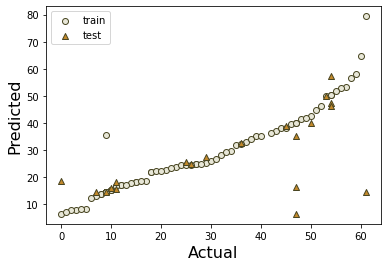

In [9]:
plt.scatter(y_pred1,y_train,label='train',color='#e8e7d8',edgecolors='#494623')
plt.scatter(y_pred,y_test,label='test',color='#c3892b',marker ="^",edgecolors='#494623')
plt.xlabel('Actual',fontsize=16)
plt.ylabel('Predicted',fontsize=16)
plt.legend()